<a href="https://colab.research.google.com/github/jjoshuakkim/COMP-5600/blob/main/AI_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading dependencies

In [3]:
!pip install datasets transformers pandas matplotlib tqdm --upgrade --quiet > /dev/null 2>&1
!pip install transformers > /dev/null 2>&1
!pip install evaluate > /dev/null 2>&1

Parsing dataset

In [16]:
from datasets import load_dataset
from transformers import AutoTokenizer
from transformers import DataCollatorWithPadding
import evaluate
import pandas as pd

dataset = load_dataset("go_emotions", "simplified")
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

def tokenize_function(examples):
   return tokenizer(examples["text"], padding="max_length", truncation=True)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

train_df = pd.DataFrame(dataset['train'])
test_df = pd.DataFrame(dataset['test'])
validation_df = pd.DataFrame(dataset['validation'])

Map:   0%|          | 0/5426 [00:00<?, ? examples/s]

Preprocess the text data by converting it to a numerical representation using a CountVectorizer

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_df['text'])
X_test = vectorizer.transform(test_df['text'])
X_val = vectorizer.fit_transform(validation_df['text'])
y_train = train_df['labels']
y_test = test_df['labels']
y_val = validation_df['labels']

Training the logistic regression model

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np

# Convert multi-label format to binary array format
mlb = MultiLabelBinarizer()
y_train_binary = mlb.fit_transform(train_df['labels'])
y_train_binary_flat = np.argmax(y_train_binary, axis=1)
y_test_binary = mlb.transform(test_df['labels'])
y_test_binary_flat = np.argmax(y_test_binary, axis=1)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train_binary_flat)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

Classification Report

In [7]:
from sklearn.metrics import classification_report

y_pred_binary = model.predict(X_test)

print("Logistic Regression Results:")
print()
report = classification_report(y_test_binary_flat, y_pred_binary)
print(report)

Logistic Regression Results:

              precision    recall  f1-score   support

           0       0.59      0.59      0.59       504
           1       0.73      0.77      0.75       252
           2       0.49      0.35      0.40       197
           3       0.30      0.15      0.20       286
           4       0.32      0.21      0.25       318
           5       0.33      0.19      0.24       114
           6       0.33      0.22      0.26       139
           7       0.32      0.14      0.19       233
           8       0.53      0.24      0.33        74
           9       0.33      0.14      0.20       127
          10       0.25      0.13      0.17       220
          11       0.53      0.36      0.43        84
          12       0.33      0.13      0.19        30
          13       0.38      0.27      0.32        84
          14       0.76      0.57      0.65        74
          15       0.78      0.84      0.81       288
          16       1.00      0.17      0.29        

LR Training Loss Curve

Epoch 1, Loss: 1.4129047041226144
Epoch 2, Loss: 1.4129047041226144
Epoch 3, Loss: 1.4129047041226144
Epoch 4, Loss: 1.4129047041226144
Epoch 5, Loss: 1.4129047041226144
Epoch 6, Loss: 1.4129047041226144
Epoch 7, Loss: 1.4129047041226144
Epoch 8, Loss: 1.4129047041226144
Epoch 9, Loss: 1.4129047041226144
Epoch 10, Loss: 1.4129047041226144


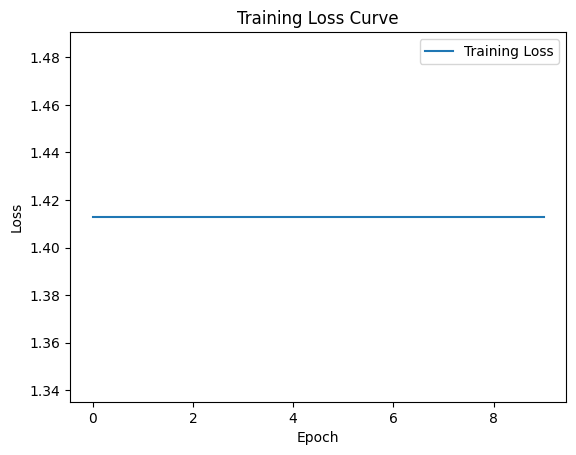

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore", category=UserWarning)
tfidf_vectorizer = TfidfVectorizer()

X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['text'])
X_test_tfidf = tfidf_vectorizer.transform(test_df['text'])

# Train logistic regression model
model = LogisticRegression(max_iter=200)
losses = []

for epoch in range(10):  # Assuming 10 epochs
    # Fit the model for one epoch
    model.fit(X_train_tfidf, y_train_binary_flat)

    # Compute loss
    y_pred_proba = model.predict_proba(X_train_tfidf)
    loss = -np.mean(np.log(y_pred_proba[np.arange(len(y_train)), y_train_binary_flat]))
    losses.append(loss)

    print(f"Epoch {epoch + 1}, Loss: {loss}")

plt.plot(losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()

Multi-Layer Perceptron

  0%|          | 0/200 [00:00<?, ?iter/s]/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
  0%|          | 0/200 [1:59:09<?, ?iter/s]


MLP Results:

              precision    recall  f1-score   support

           0       0.58      0.54      0.56       504
           1       0.66      0.67      0.67       252
           2       0.33      0.35      0.34       197
           3       0.18      0.21      0.19       286
           4       0.25      0.22      0.24       318
           5       0.17      0.24      0.20       114
           6       0.21      0.24      0.22       139
           7       0.18      0.18      0.18       233
           8       0.35      0.19      0.25        74
           9       0.15      0.14      0.14       127
          10       0.17      0.15      0.16       220
          11       0.41      0.29      0.34        84
          12       0.32      0.23      0.27        30
          13       0.35      0.31      0.33        84
          14       0.57      0.49      0.53        74
          15       0.81      0.72      0.76       288
          16       0.25      0.17      0.20         6
          17 

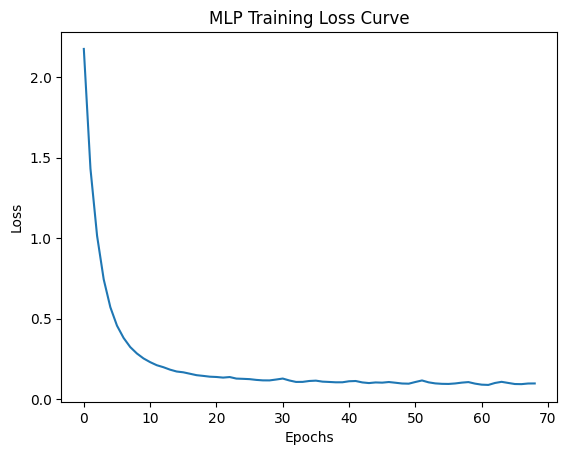

In [9]:
from sklearn.neural_network import MLPClassifier
from tqdm import tqdm

# Create the MLP Classifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=200, batch_size=64, activation='relu', solver='adam', alpha=0.001, random_state=42)

# Train the MLPClassifier with a progress bar
with tqdm(total=200, unit="iter") as pbar:
    mlp_model.fit(X_train, y_train_binary_flat)

# Predictions on the test set
y_pred = mlp_model.predict(X_test)

# Generate classification report
print("MLP Results:")
print()
report = classification_report(y_test_binary_flat, y_pred)
print(report)

# Plotting the loss curve
plt.plot(mlp_model.loss_curve_)
plt.title('MLP Training Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()